# Ponderada Semana 5 - Rnn com biblioteca 

## Importando os dados

[inserir informações do keggle]

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/Month_Value_1.csv')
df

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


O dataset apresenta as seguintes colunas 

- **Period**: Representa o período de tempo (provavelmente mensal).
- **Revenue**: A receita gerada durante o período.
- **Sales_quantity**: A quantidade de vendas realizadas durante o período.
- **Average_cost**: O custo médio associado às vendas.
- **The_average_annual_payroll_of_the_region**: A folha de pagamento anual média da região.

### Realizando uma breve análise exploratória sobre os dados

In [5]:
df.shape

(96, 5)

In [6]:
# Entendendo a quantidade de dados nulos 
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

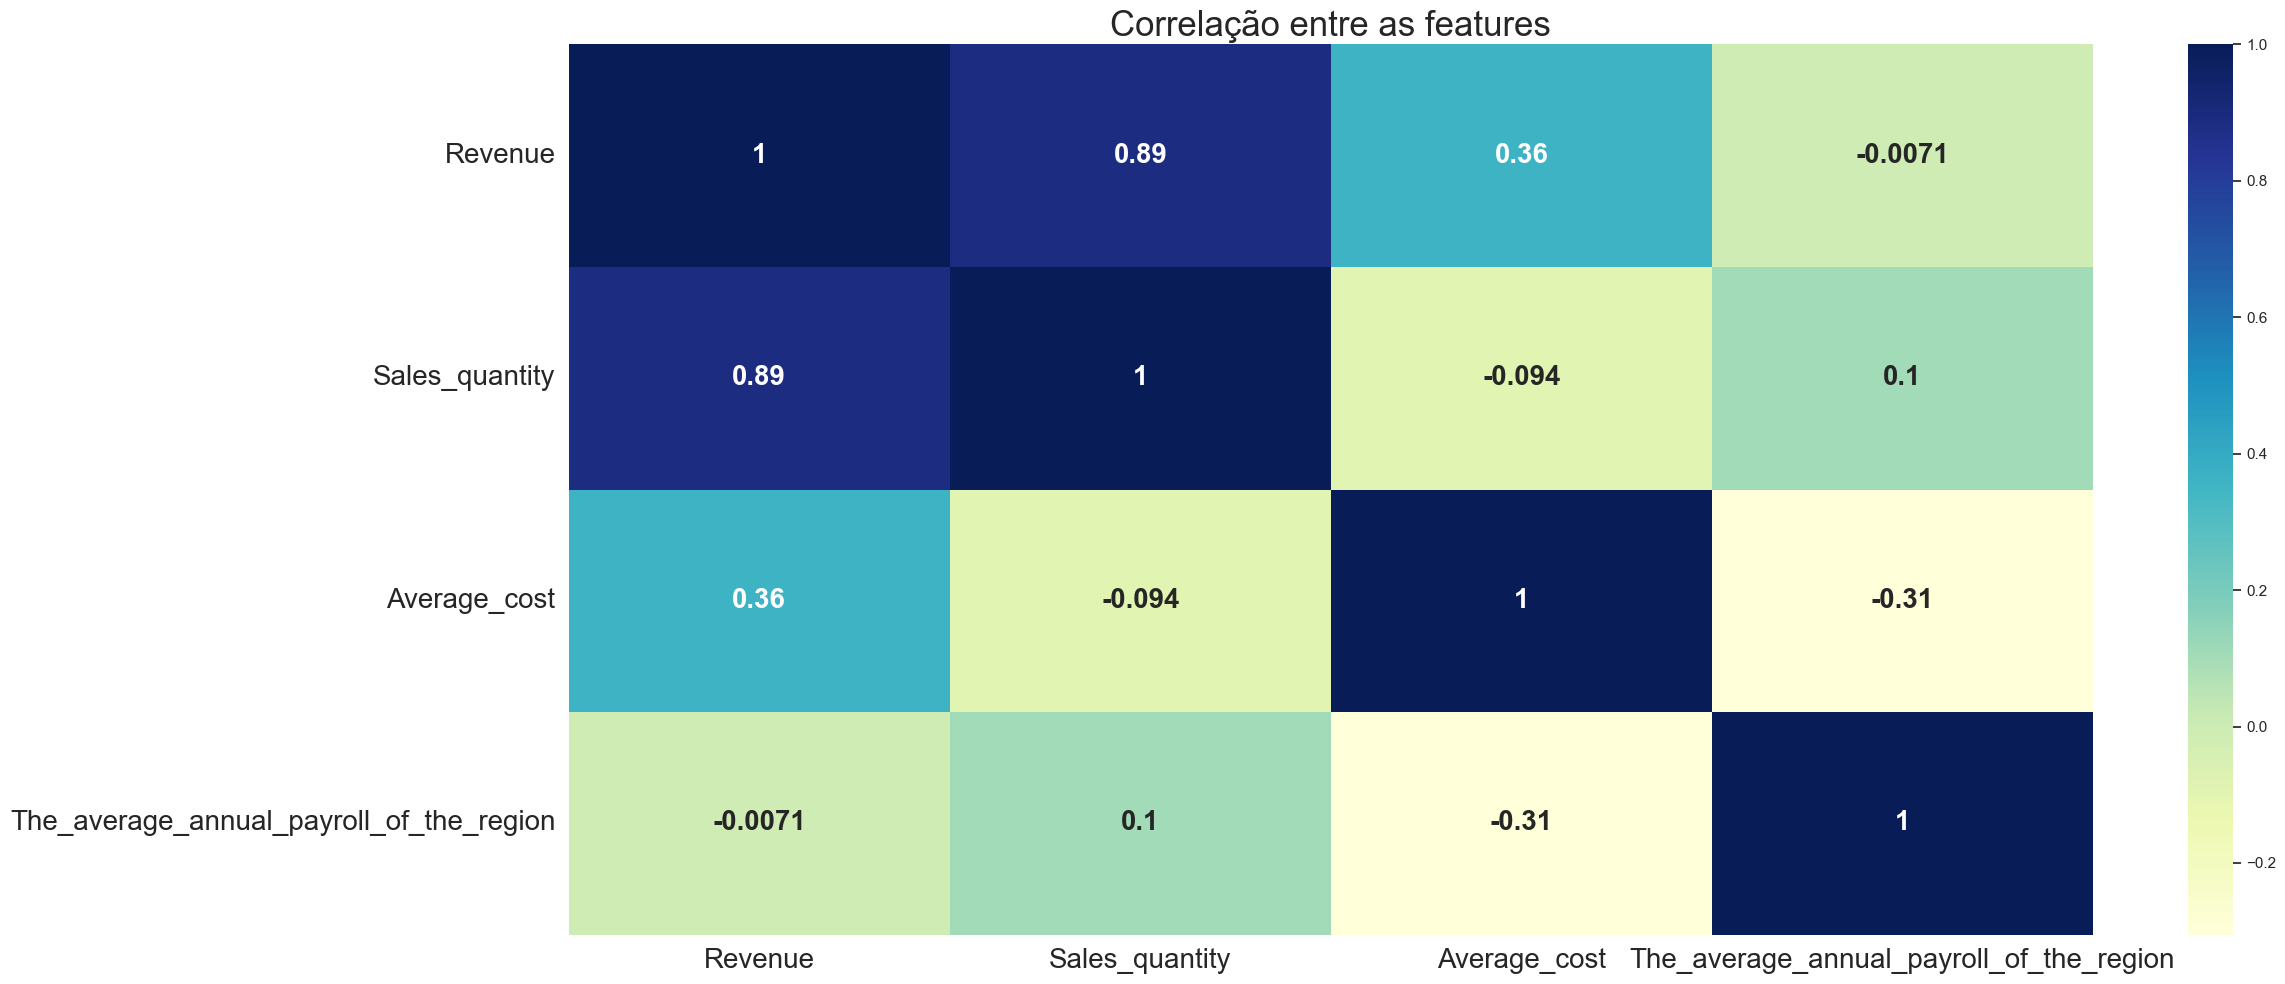

In [7]:
# Obtendo a correlação entre as features 
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']].corr()

plt.figure(figsize=(25, 10)) 
sns.set_theme(style="whitegrid")  

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", annot_kws={"fontsize": 20, "fontweight": "bold"})  
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

plt.title('Correlação entre as features', fontsize=25)

plt.tight_layout()  
plt.show()

**Pré processamento**

In [8]:
# Tratando os dados nulos com interpolação
df['Revenue'] = df['Revenue'].interpolate(method='linear')
df['Average_cost'] = df['Average_cost'].interpolate(method='linear')
df['Sales_quantity'] = df['Sales_quantity'].interpolate(method='linear')
df['The_average_annual_payroll_of_the_region'] = df['The_average_annual_payroll_of_the_region'].interpolate(method='linear')

In [9]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [10]:
# Convertendo a coluna 'Period' para datetime e definindo como índice
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df.set_index('Period', inplace=True)

In [51]:
df.sort_index(inplace=True)
df

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-08-01,5.232069e+07,26615.0,1965.834790,29044998.0
2022-09-01,5.232069e+07,26615.0,1965.834790,29044998.0
2022-10-01,5.232069e+07,26615.0,1965.834790,29044998.0


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
# Selecionando as variáveis (features) para o modelo
features = df[['Revenue', 'Sales_quantity', 'Average_cost']]  

# Normalizando as variáveis
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [53]:
features

,Revenue,Sales_quantity,Average_cost
Period,,,
2015-01-01,1.601007e+07,12729.0,1257.763541
2015-02-01,1.580759e+07,11636.0,1358.507000
2015-03-01,2.204715e+07,15922.0,1384.697024
2015-04-01,1.881458e+07,15227.0,1235.606705
2015-05-01,1.402148e+07,8620.0,1626.621765
...,...,...,...
2022-08-01,5.232069e+07,26615.0,1965.834790
2022-09-01,5.232069e+07,26615.0,1965.834790
2022-10-01,5.232069e+07,26615.0,1965.834790


In [54]:
import numpy as np

# Função para criar sequências multivariadas
def create_multivariate_sequences(data, time_step=12):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step, 0]) 
    return np.array(X), np.array(y)

## Implementando a RNN e escolhendo uma métrica

Para o problema de previsão de séries temporais, como no caso de prever a Receita, a Mean Absolute Error (MAE) é uma métrica adequada porque mede a média das diferenças absolutas entre os valores previstos e os valores reais. 

O MAE é intuitivo e de fácil interpretação, pois representa o erro médio em unidades reais da variável, facilitando a compreensão do desempenho do modelo. Além disso, o MAE é menos sensível a outliers em comparação com métricas como o Mean Squared Error (MSE), o que é particularmente vantajoso em contextos de negócios, onde outliers podem distorcer a avaliação do modelo. 

Sua aplicabilidade em análises financeiras é relevante, pois demonstra o erro médio esperado de forma direta, permitindo ajustes mais precisos e decisões informadas (Chai & Draxler, 2014).

https://www.researchgate.net/publication/272024186_Root_mean_square_error_RMSE_or_mean_absolute_error_MAE-_Arguments_against_avoiding_RMSE_in_the_literature 

In [55]:
# Criando as sequências
time_step = 12
X, y = create_multivariate_sequences(scaled_features, time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Construindo o modelo LSTM Multivariado
model = Sequential()
model.add(LSTM(units=150, activation='tanh', return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(LSTM(units=100, activation='tanh', return_sequences=True))
model.add(LSTM(units=50, activation='tanh', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', 'accuracy'])


/Users/gabrielcarneiro/Documents/GitHub/rnn_dataset_serie_temporal/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 12, 150)        │        92,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 12, 100)        │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,051 (871.29 KB)

 Trainable params: 223,051 (871.29 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:

# Treinamento com validação
h = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/200


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.4956 - mae: 0.4956 - val_accuracy: 0.0000e+00 - val_loss: 0.6288 - val_mae: 0.6288
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 0.3979 - mae: 0.3979 - val_accuracy: 0.0000e+00 - val_loss: 0.4428 - val_mae: 0.4428
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0000e+00 - loss: 0.2905 - mae: 0.2905 - val_accuracy: 0.0000e+00 - val_loss: 0.2021 - val_mae: 0.2021
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0167 - loss: 0.1695 - mae: 0.1695 - val_accuracy: 0.0000e+00 - val_loss: 0.1242 - val_mae: 0.1242
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0167 - loss: 0.1519 - mae: 0.1519 - val_accuracy: 0.0000e+00 - val_loss: 0.2540 - val_mae: 0.2540
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0167 - loss: 0.2081 - mae: 0.2081 - val_accuracy: 0.0000e+00 - val_loss: 0.1745 - val_mae: 0.1745
Epoch 7/200
1/1 ━━━━━━━━━━━━━━

In [64]:
# Previsões
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], 2))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))], axis=1))[:, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [65]:
# Avaliando com MAE
mae = np.mean(np.abs(y_test_actual - predictions))
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 963290.1040267186


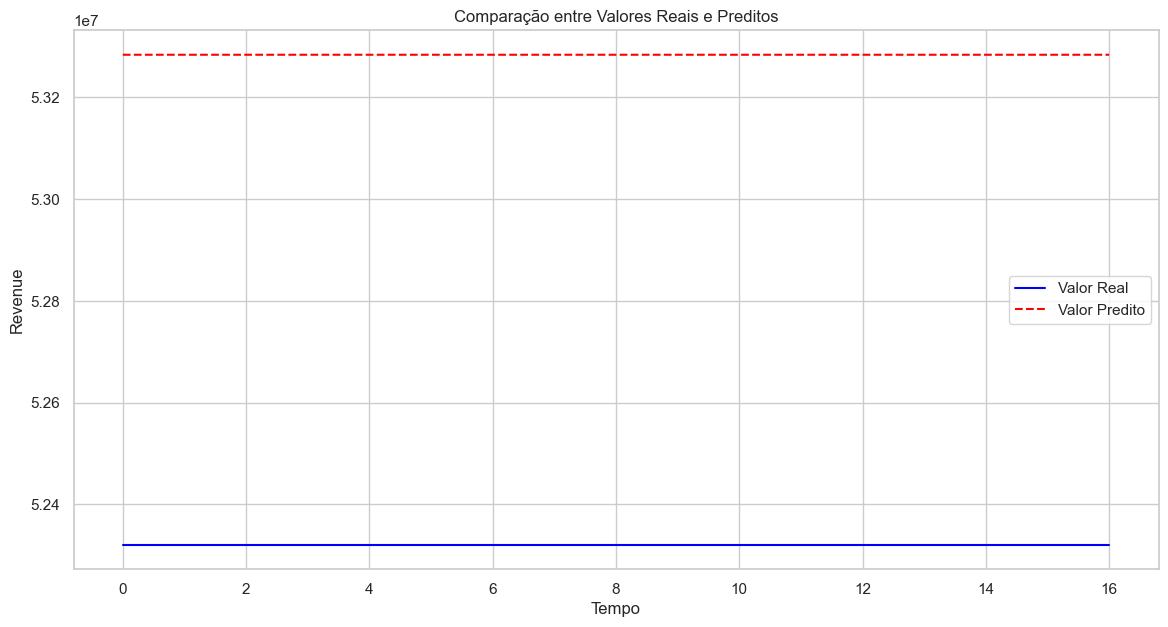

In [66]:
# Plotando os resultados
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Valor Real', color='blue')
plt.plot(predictions, label='Valor Predito', color='red', linestyle='--')
plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Tempo')
plt.ylabel('Revenue')
plt.legend()
plt.show()